# Cena do Rap

## Perguntas

- qual o artista mais popular nas playlists brasileiras?
- existe algo que correlacione com popularidade para o rap?
- quais são as características mais comuns para as músicas mais populares?

In [1]:
%store -r import_all_libs

In [2]:
import_all_libs

In [3]:
import re

In [4]:
def artists_to_list(data):
    artists = data
    if isinstance(data, pd.DataFrame):
        artists = data['artists']
    artists = artists.split("']")
    artists.pop() # remove last string thats not an artist
    return [x[x.find(next(filter(str.isalpha, x))):].translate({ord(c): "" for c in "!\'@#$%^&*()[]{};:./<>?\|`~-=_+"}).split(',')[0] for x in artists]


In [5]:
plt.style.use('seaborn-deep')

In [6]:
df = pd.read_csv('df_clean.csv')

In [7]:
df.head()

,added_at,album_name,track_number,artists,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,playlist_name,playlist_description
0,2021-03-13T15:01:00Z,NU,1,"[['Djonga', '204IwDdaHE4ymGk9Kya2pY'], ['Nagal...",Nós,67,0.70,0.82,10,-5.20,0,0.54,0.10,0.00,0.08,0.58,86.77,audio_features,193800,4,RAPública,Ouça o melhor do hip hop nacional. Foto: Djonga
1,2021-03-13T15:01:00Z,Mds,1,"[['Kawe', '1TYJOhNSxMOODWiDVhuyZb'], ['Mc Lele...",Mds,84,0.89,0.56,6,-5.33,1,0.25,0.26,0.00,0.12,0.64,140.02,audio_features,125143,4,RAPública,Ouça o melhor do hip hop nacional. Foto: Djonga
2,2021-03-13T15:01:00Z,Para todas as mulheres que já rimei,1,"[['BIN', '1WXbiUMl1AT9Inb619xPUg'], ['Borges',...",Quase uma Semana,73,0.81,0.77,1,-5.70,0,0.08,0.10,0.00,0.06,0.80,122.06,audio_features,259672,4,RAPública,Ouça o melhor do hip hop nacional. Foto: Djonga
3,2021-03-13T15:01:00Z,Nada é pra sempre,1,"[['L7NNON', '0JjPiLQNgAFaEkwoy56B1C']]",Nada é pra sempre,62,0.72,0.48,0,-10.25,1,0.08,0.19,0.00,0.05,0.37,95.06,audio_features,229928,4,RAPública,Ouça o melhor do hip hop nacional. Foto: Djonga
4,2021-03-13T15:01:00Z,Lance Criminoso (feat. BK),1,"[['Papatinho', '0iZz25uH5PLaShpqq84uYv'], ['Xa...",Lance Criminoso (feat. BK),65,0.57,0.65,0,-6.70,0,0.48,0.27,0.00,0.12,0.69,81.34,audio_features,234098,5,RAPública,Ouça o melhor do hip hop nacional. Foto: Djonga


In [8]:
df.shape

(1363, 22)

In [9]:
df.playlist_name.value_counts()

Hip Hop Controller          100
I Love My '90s Hip-Hop      100
Hip Hop Crew                 82
Rap Acústico                 80
Beast Mode Hip-Hop           76
Presença Hip Hop             71
Trap Ouro                    70
Dose Trap                    70
creme                        70
Gigantes do Rap Nacional     65
Trapperz Brasil              60
DOPE.                        60
TRAPando                     60
Resenha na Praia             60
Flow Romance                 60
RAPública                    60
Trap Classe                  60
Rap Workout                  59
Feelin' Myself               50
RapCaviar                    50
Name: playlist_name, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   added_at              1363 non-null   object 
 1   album_name            1363 non-null   object 
 2   track_number          1363 non-null   int64  
 3   artists               1363 non-null   object 
 4   name                  1363 non-null   object 
 5   popularity            1363 non-null   int64  
 6   danceability          1363 non-null   float64
 7   energy                1363 non-null   float64
 8   key                   1363 non-null   int64  
 9   loudness              1363 non-null   float64
 10  mode                  1363 non-null   int64  
 11  speechiness           1363 non-null   float64
 12  acousticness          1363 non-null   float64
 13  instrumentalness      1363 non-null   float64
 14  liveness              1363 non-null   float64
 15  valence              

In [11]:
br_playlists = ['Presença Hip Hop', 'Dose Trap', 'Trap Ouro', 'creme', 'Gigantes do Rap Nacional', 'TRAPando', 'Trapperz Brasil', 'Trap Classe', 'Flow Romance', 'Resenha na Praia', 'RAPública']

df = df[~df.duplicated(subset=['name'])]
df_brazil = df[df.playlist_name.isin(br_playlists)]

In [12]:
# df_brazil.to_csv('df_brazil.csv', index=False)

In [13]:
df.describe()

,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00,1071.00
mean,2.67,54.36,0.75,0.59,5.43,-7.44,0.44,0.20,0.25,0.00,0.17,0.53,117.30,208756.27,3.98
std,3.52,20.40,0.12,0.14,3.67,2.50,0.50,0.13,0.22,0.03,0.14,0.21,27.60,70957.66,0.30
min,1.00,0.00,0.29,0.14,0.00,-19.14,0.00,0.03,0.00,0.00,0.04,0.04,52.15,64654.00,1.00
25%,1.00,43.00,0.67,0.49,1.50,-8.88,0.00,0.08,0.06,0.00,0.10,0.37,94.15,166113.50,4.00
50%,1.00,58.00,0.77,0.60,6.00,-7.20,0.00,0.19,0.19,0.00,0.12,0.54,116.06,195429.00,4.00
75%,3.00,68.00,0.84,0.69,9.00,-5.61,1.00,0.30,0.39,0.00,0.19,0.70,137.66,232786.50,4.00
max,30.00,98.00,0.97,0.96,11.00,-0.81,1.00,0.82,0.96,0.58,0.94,0.97,249.44,759036.00,5.00


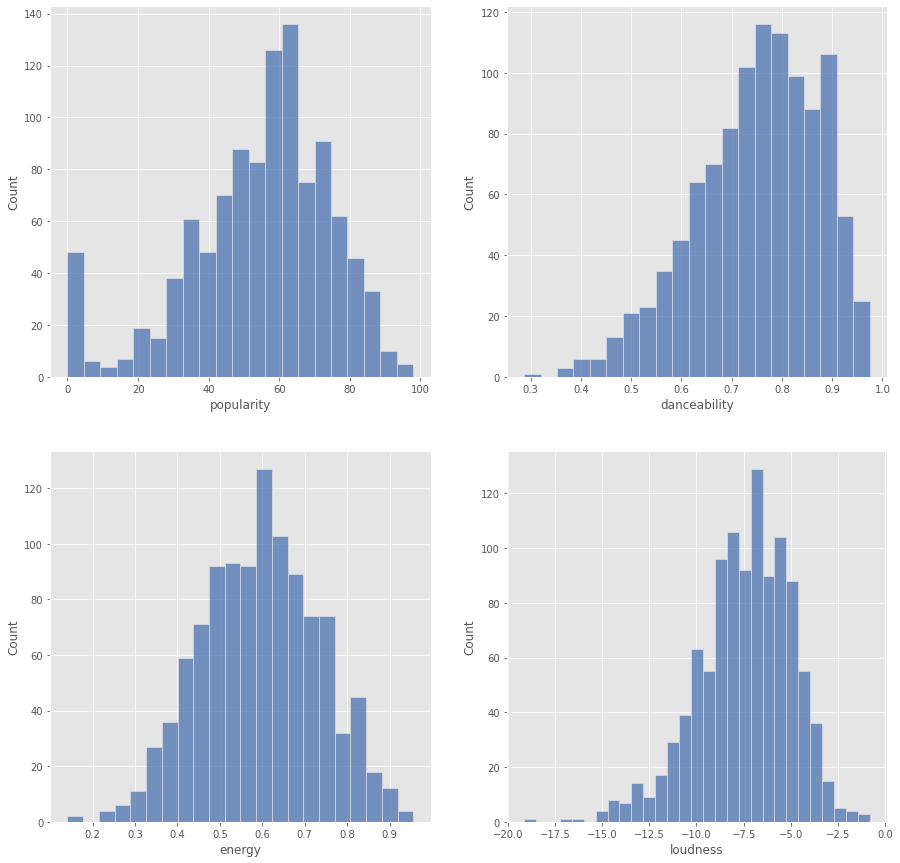

In [14]:
analysis_cols = [
    'popularity', 
    'danceability', 
    'energy', 
    'loudness', 
    'speechiness', 
    'acousticness', 
    'instrumentalness', 
    'liveness', 
    'valence', 
    'tempo', 
    'duration_ms'
]
fig, axs = plt.subplots(2, 2, figsize=(15,15))

def plot_hist_in_ax(axs, col_name):
    sns.histplot(data=df[col_name], ax=axs)

cnt = 0
for i in range(2):
    for j in range(2):
        plot_hist_in_ax(axs[i][j], analysis_cols[cnt])
        cnt += 1

4
5


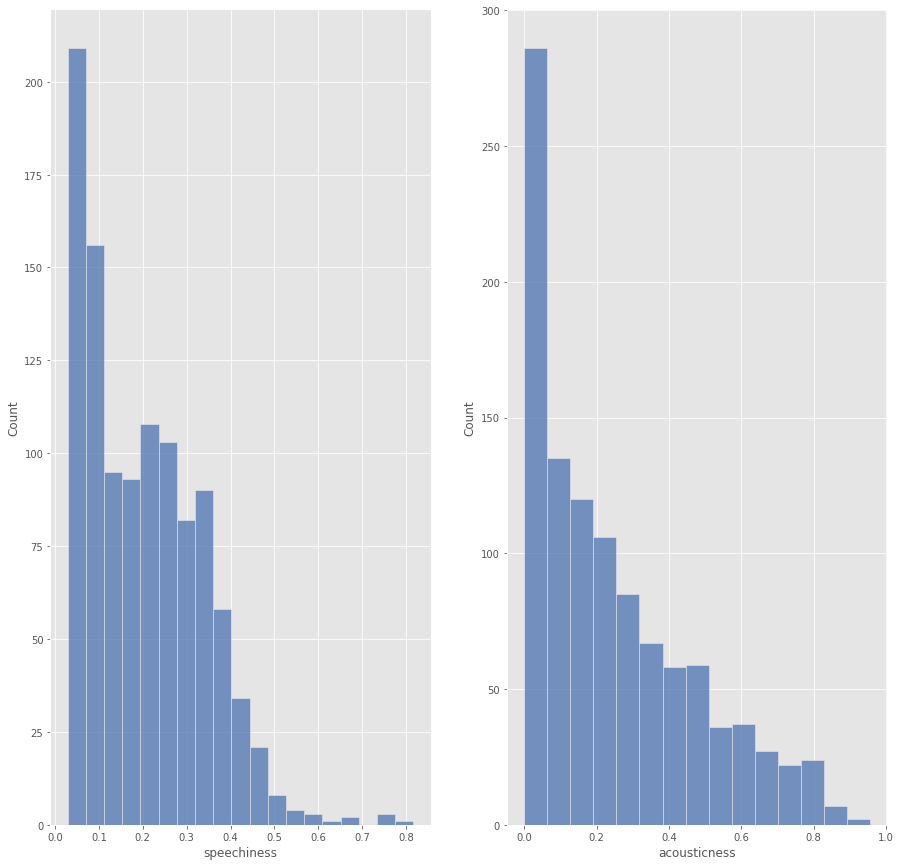

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))

cnt = 4
for i in range(2):
#     for j in range(2):
    print(cnt)
    plot_hist_in_ax(axs[i], analysis_cols[cnt])
    cnt += 1

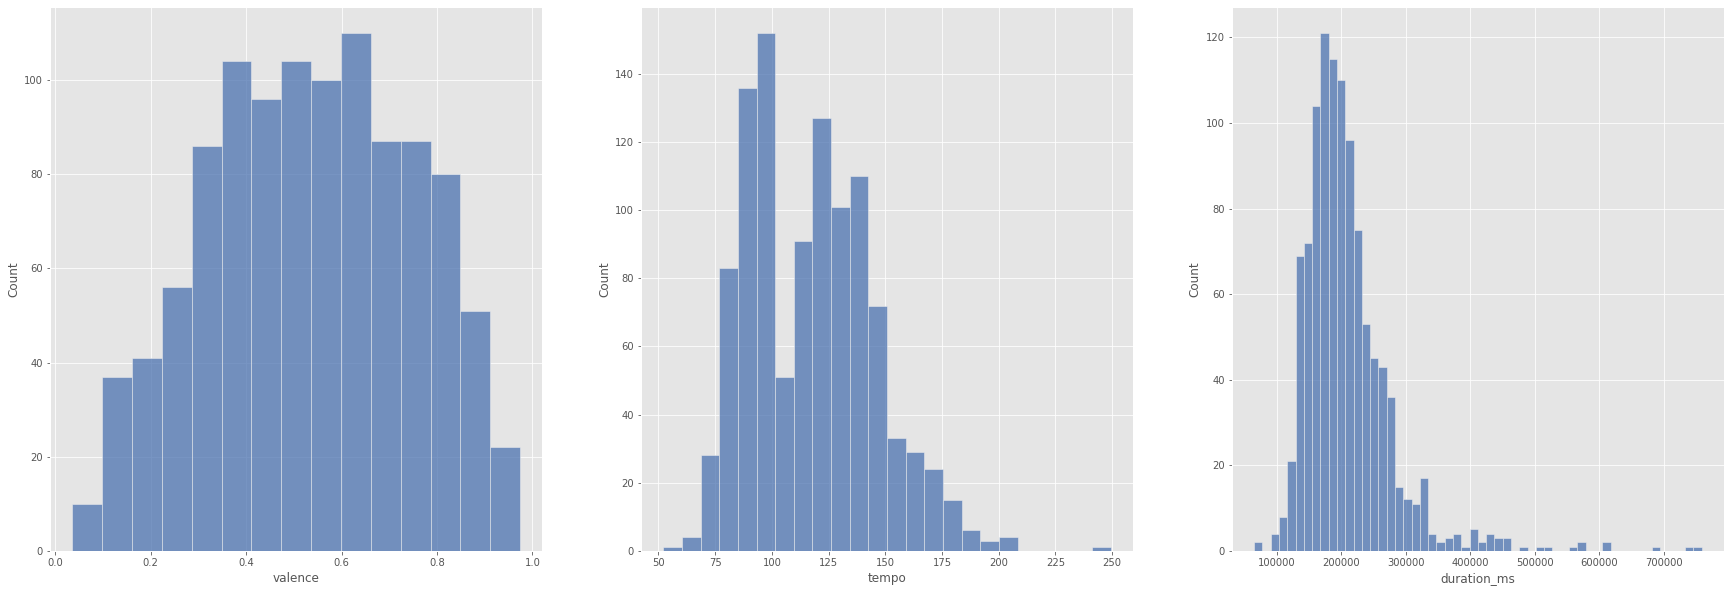

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(30,10))

cnt = 8
for i in range(3):
    plot_hist_in_ax(axs[i], analysis_cols[cnt])
    cnt += 1

In [21]:
normalized_df=(df-df.mean())/df.std()

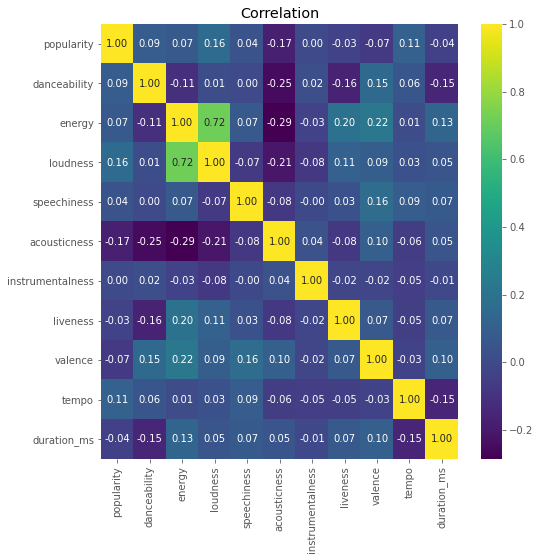

In [26]:
plt.figure(figsize=(8, 8))
plt.title("Correlation")
sns.heatmap(df[analysis_cols].corr(), annot=True, fmt='.2f', cmap='viridis');

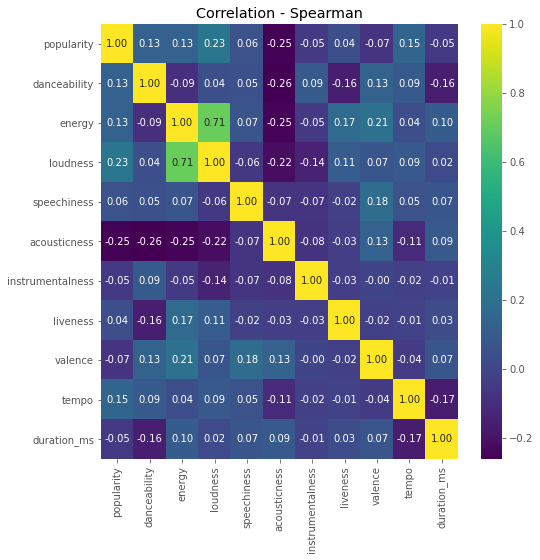

In [29]:
plt.figure(figsize=(8, 8))
plt.title("Correlation - Spearman")
sns.heatmap(df[analysis_cols].corr('spearman'), annot=True, fmt='.2f', cmap='viridis');

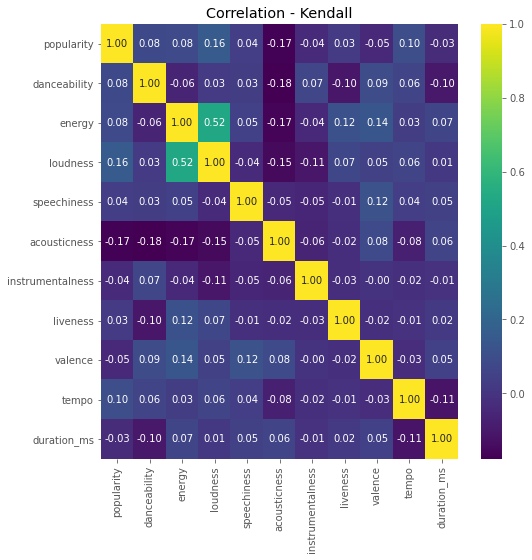

In [31]:
plt.figure(figsize=(8, 8))
plt.title("Correlation - Kendall")
sns.heatmap(df[analysis_cols].corr('kendall'), annot=True, fmt='.2f', cmap='viridis');

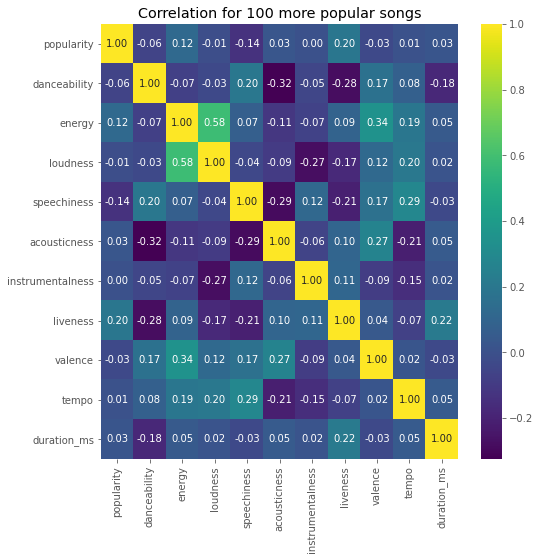

In [27]:
df_sorted = df.sort_values('popularity', ascending=False).nlargest(100, 'popularity').drop_duplicates(['name']) # 100 more popular songs

plt.figure(figsize=(8, 8))
plt.title("Correlation for 100 more popular songs")
sns.heatmap(df_sorted[analysis_cols].corr(), annot=True, fmt='.2f', cmap='viridis');

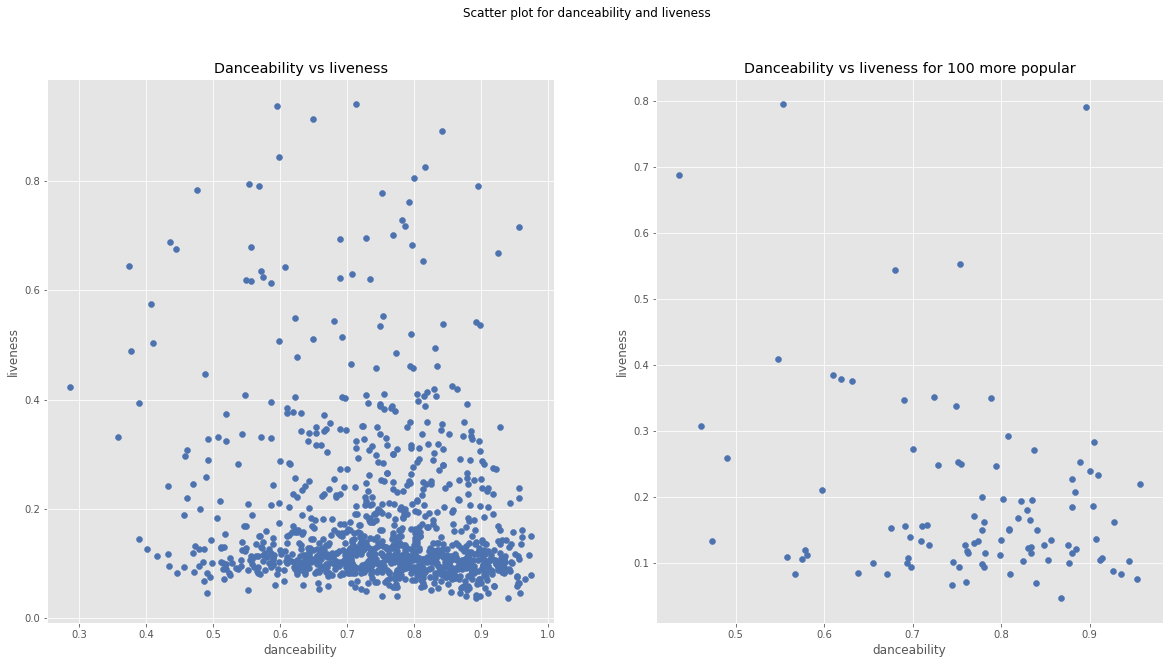

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Scatter plot for danceability and liveness')
ax1.scatter(df.danceability, df.liveness)
ax1.set_title('Danceability vs liveness')
ax1.set_xlabel('danceability')
ax1.set_ylabel('liveness')
ax2.scatter(df_sorted.danceability, df_sorted.liveness)
ax2.set_title('Danceability vs liveness for 100 more popular')
ax2.set_xlabel('danceability')
ax2.set_ylabel('liveness');

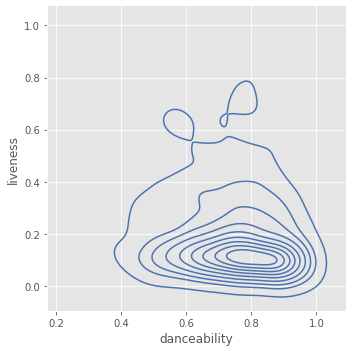

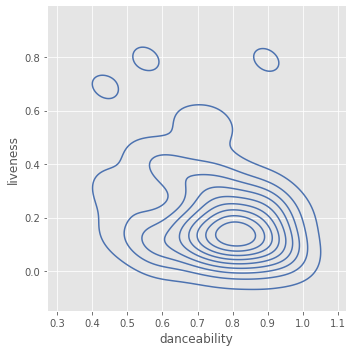

In [35]:
sns.displot(data=df, x="danceability", y="liveness", kind="kde")
sns.displot(data=df_sorted, x="danceability", y="liveness", kind="kde");

In [40]:
gb_playlist = df.groupby('playlist_name', as_index=False).mean().sort_values('popularity', ascending=False) # Ranking for most popular playlists
gb_playlist

,playlist_name,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,DOPE.,3.25,82.62,0.75,0.59,4.55,-6.62,0.58,0.17,0.16,0.00,0.19,0.46,125.97,186981.95,3.98
13,RapCaviar,2.62,80.16,0.79,0.59,4.30,-6.81,0.50,0.23,0.14,0.01,0.15,0.48,125.07,179917.84,3.96
0,Beast Mode Hip-Hop,3.49,75.12,0.80,0.65,5.00,-6.07,0.55,0.22,0.09,0.00,0.19,0.51,128.31,182669.25,4.00
12,Rap Workout,2.83,71.20,0.75,0.61,4.80,-6.46,0.59,0.20,0.15,0.00,0.20,0.46,123.64,194286.41,3.97
7,Hip Hop Crew,2.26,68.07,0.77,0.62,5.57,-6.59,0.45,0.18,0.13,0.00,0.15,0.44,123.10,182891.80,4.00
3,Feelin' Myself,2.56,66.40,0.85,0.61,5.12,-6.90,0.68,0.26,0.14,0.00,0.18,0.55,122.00,165772.18,4.00
18,Trapperz Brasil,1.52,64.88,0.79,0.59,5.25,-7.11,0.47,0.21,0.24,0.00,0.14,0.50,120.09,203676.00,3.97
10,RAPública,1.68,62.27,0.71,0.63,5.60,-7.00,0.37,0.22,0.31,0.00,0.13,0.58,118.48,228877.32,3.98
6,Hip Hop Controller,1.74,61.85,0.77,0.62,5.40,-6.61,0.45,0.20,0.15,0.00,0.18,0.49,124.35,183327.16,3.98
11,Rap Acústico,1.36,55.04,0.66,0.54,5.34,-8.35,0.23,0.15,0.47,0.00,0.16,0.59,113.74,252500.31,4.00


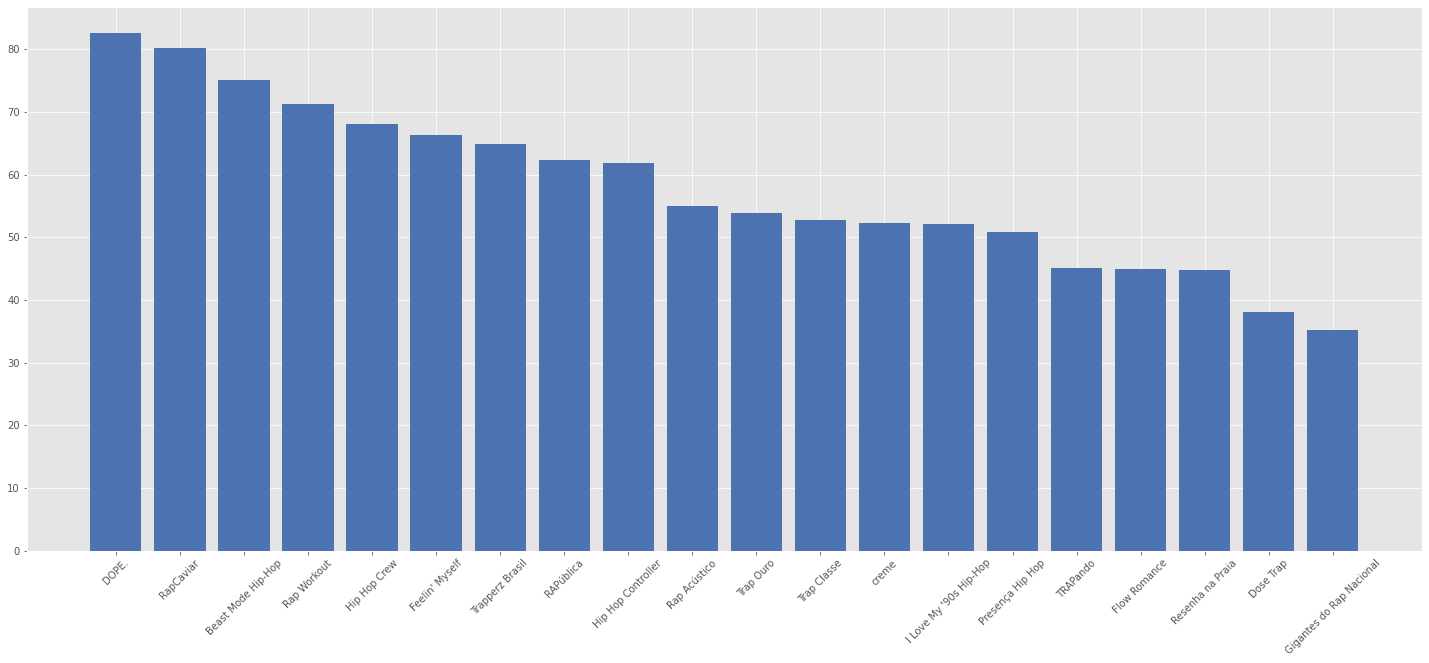

In [41]:
plt.figure(figsize=(25,10))
plt.xticks(range(len(gb_playlist.playlist_name)), gb_playlist.playlist_name, rotation=45)
plt.bar(gb_playlist.playlist_name, height=gb_playlist.popularity);

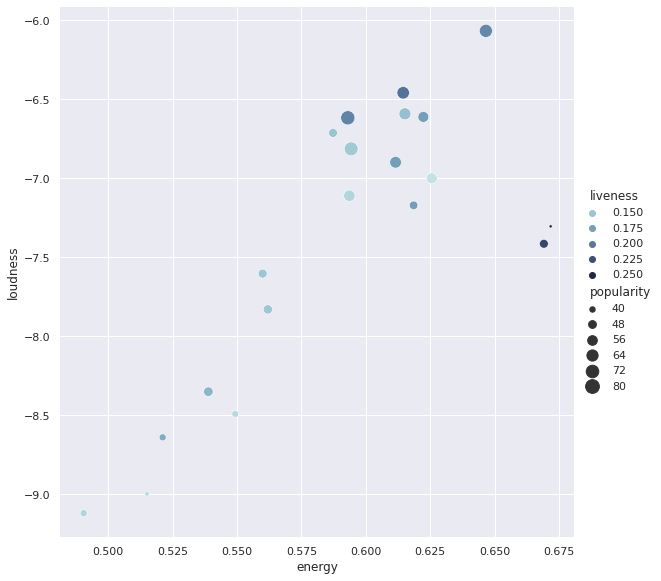

In [236]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=gb_playlist,
    x="energy", y="loudness",
    hue="liveness", size="popularity",
    palette=cmap, sizes=(10, 200),
    height=8, aspect=1
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);

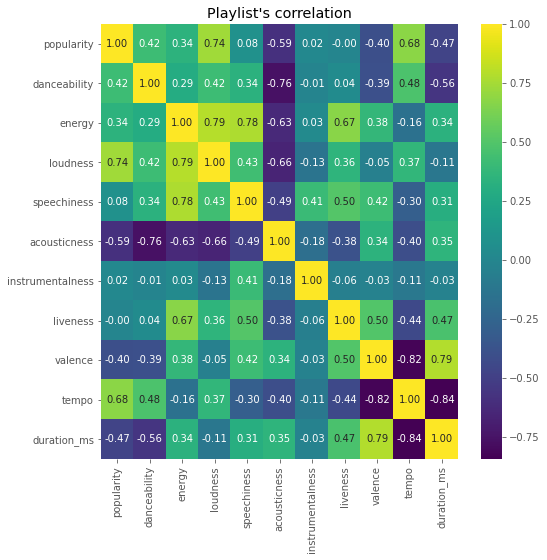

In [42]:
plt.figure(figsize=(8, 8))
plt.title("Playlist's correlation")
sns.heatmap(gb_playlist[analysis_cols].corr(), annot=True, fmt='.2f', cmap='viridis');

6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


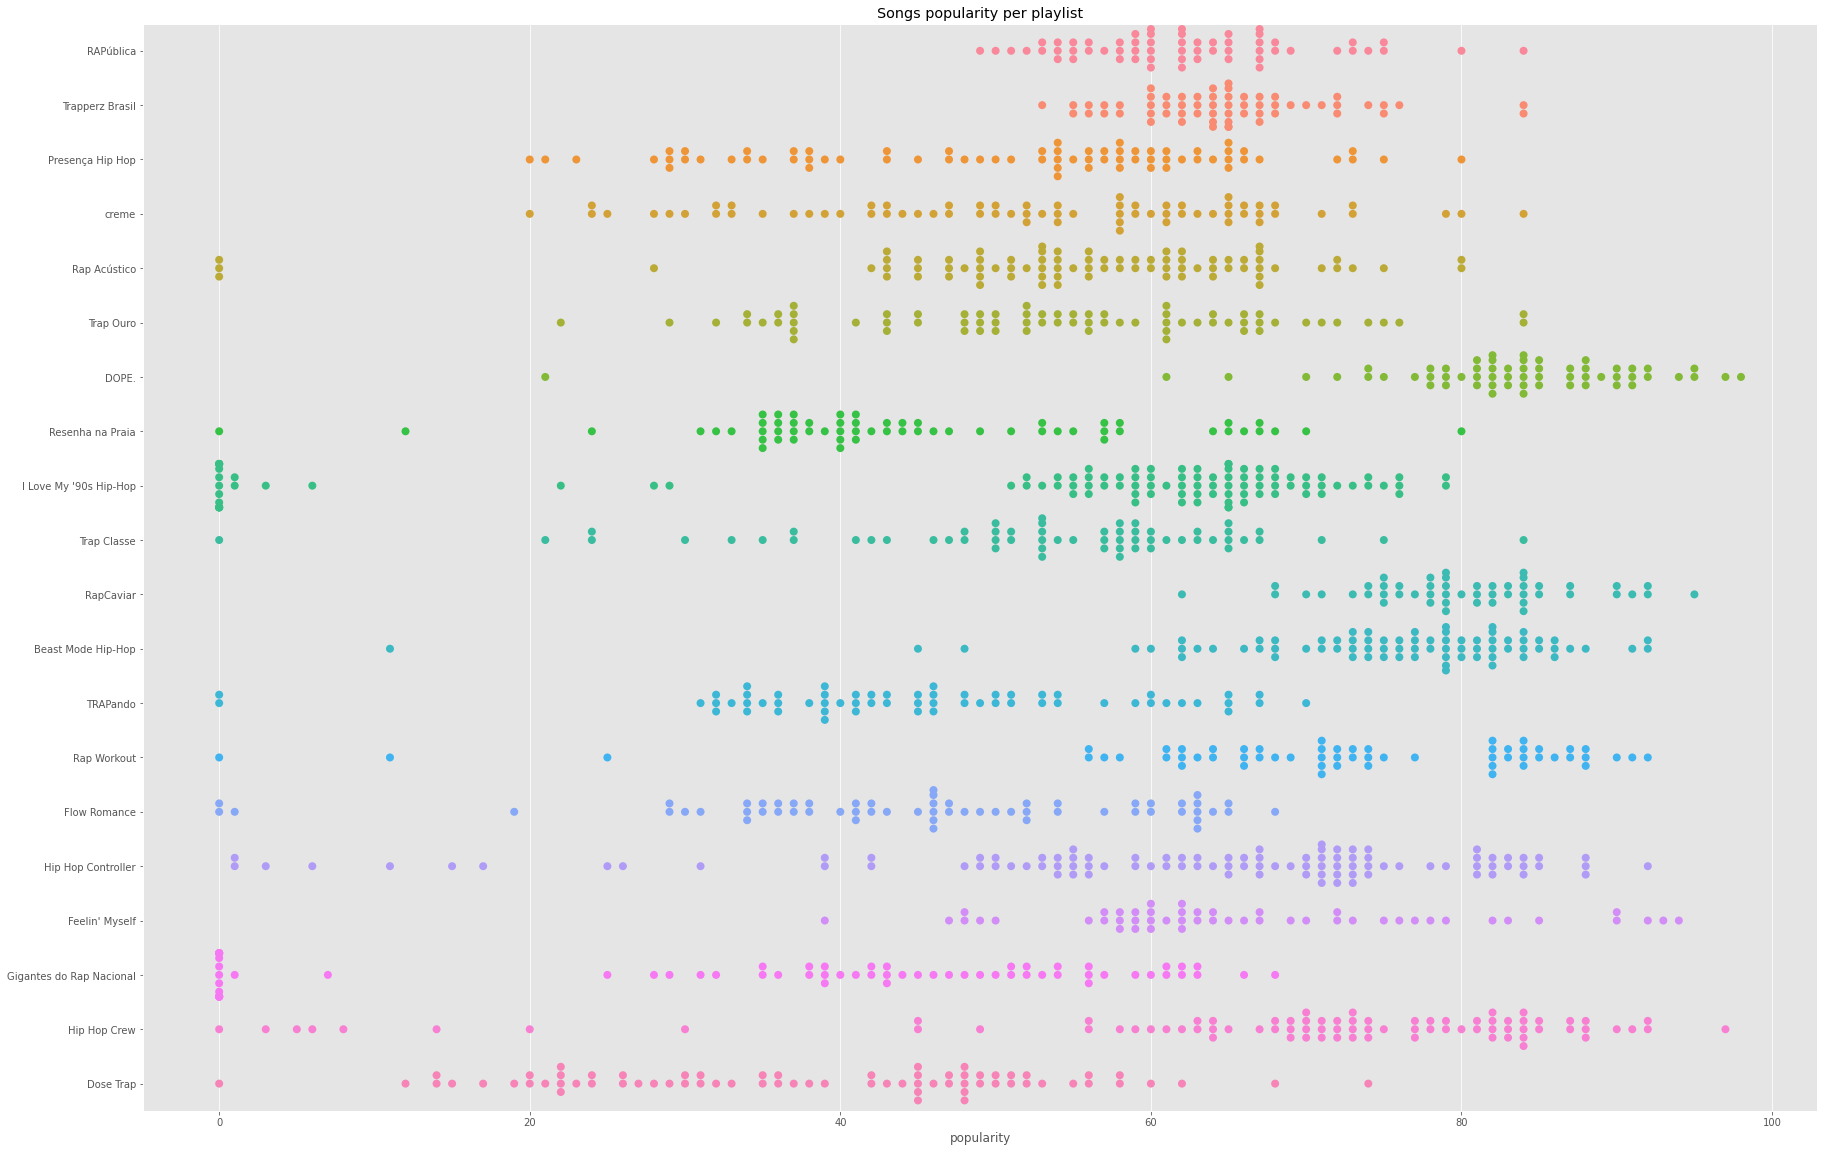

In [56]:
plt.figure(figsize=(30, 20))
ax = sns.swarmplot(data=df, x="popularity", y="playlist_name", size=8)
ax.set(ylabel="")
plt.title("Songs popularity per playlist");

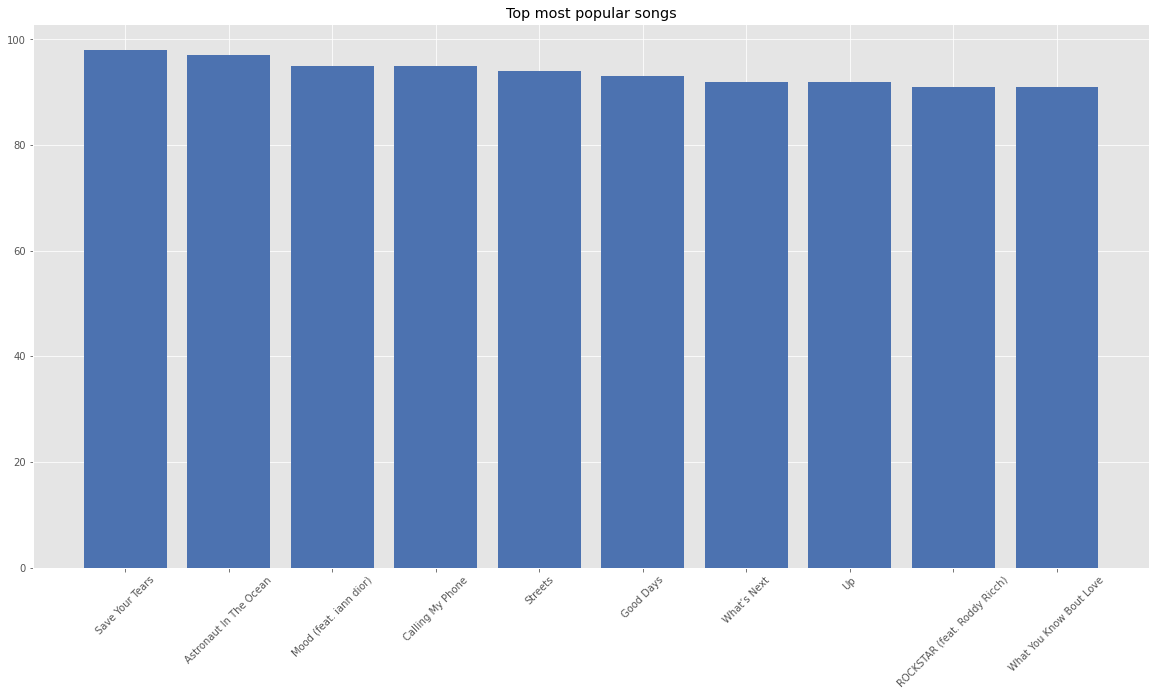

In [77]:
most_popular_songs = df_without_duplicates.sort_values('popularity', ascending=False).nlargest(10, 'popularity') # most popular songs, not actually 30 because of duplicates

def plot_bars(data, figsize=(12,10), title='Bar plot'):
    plt.figure(figsize=figsize)
    plt.xticks(range(len(data.name)), data.name, rotation=45)
    plt.bar(data.name, height=data.popularity)
    plt.title(title);
    
plot_bars(most_popular_songs, figsize=(20,10), title='Top most popular songs')

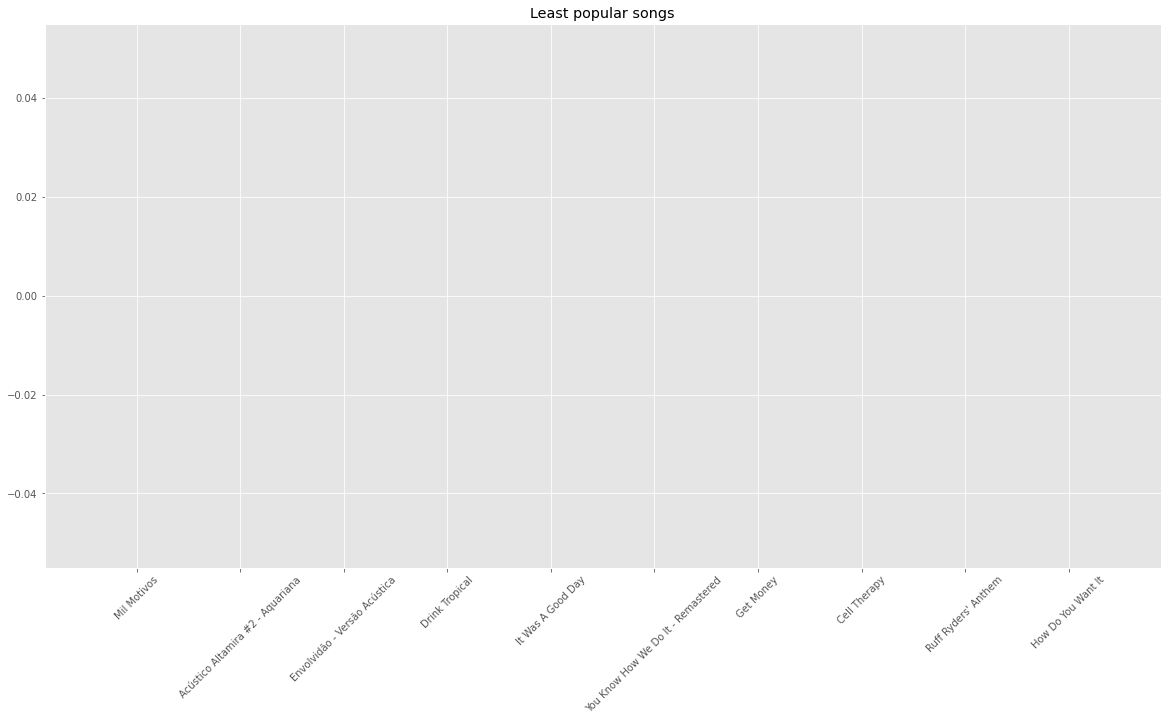

In [80]:
least_popular_songs = df.nsmallest(10, 'popularity')
plot_bars(least_popular_songs, figsize=(20,10), title='Least popular songs')

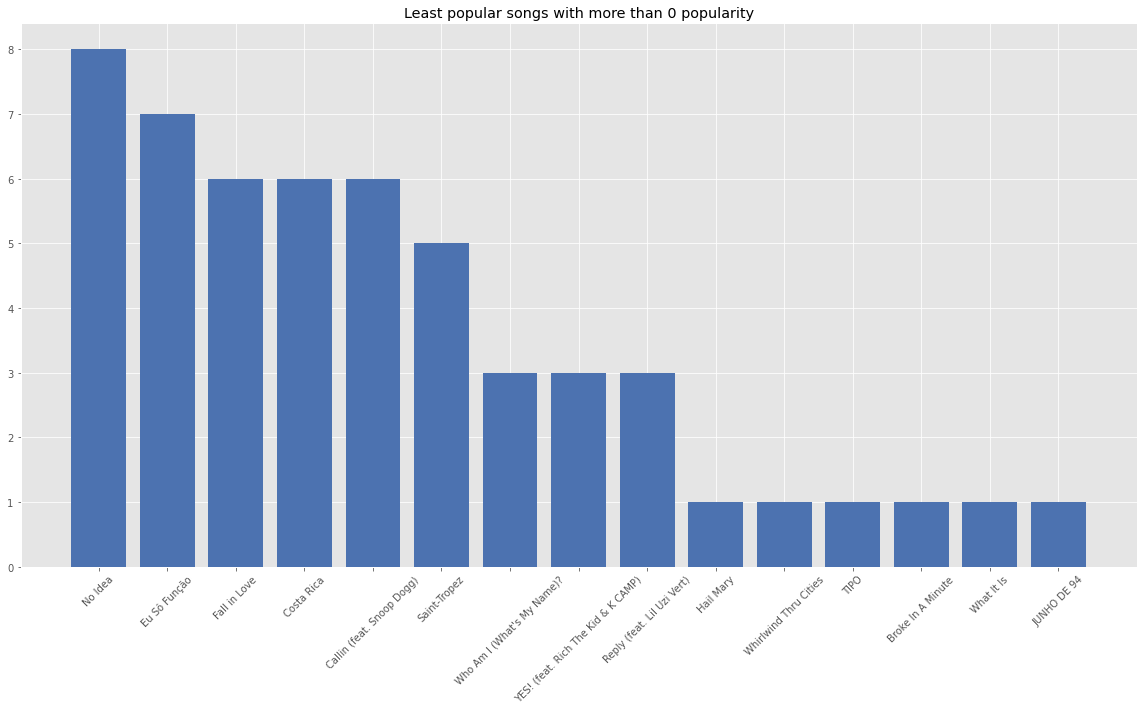

In [86]:
least_popular_above_0  = df_without_duplicates[(df_without_duplicates.popularity > 0) & (df_without_duplicates.popularity < 10)].sort_values('popularity', ascending=False)
plot_bars(least_popular_above_0, figsize=(20, 10), title='Least popular songs with more than 0 popularity')

In [88]:
artists_on_top_pop = most_popular_songs.artists.apply(artists_to_list)
artists_on_top_pop

428              [The Weeknd]
412             [Masked Wolf]
436       [kGoldn, iann dior]
414          [Lil Tjay, LACK]
419                [Doja Cat]
1108                    [SZA]
411                   [Drake]
421                 [Cardi B]
449     [DaBaby, Roddy Ricch]
446               [Pop Smoke]
Name: artists, dtype: object